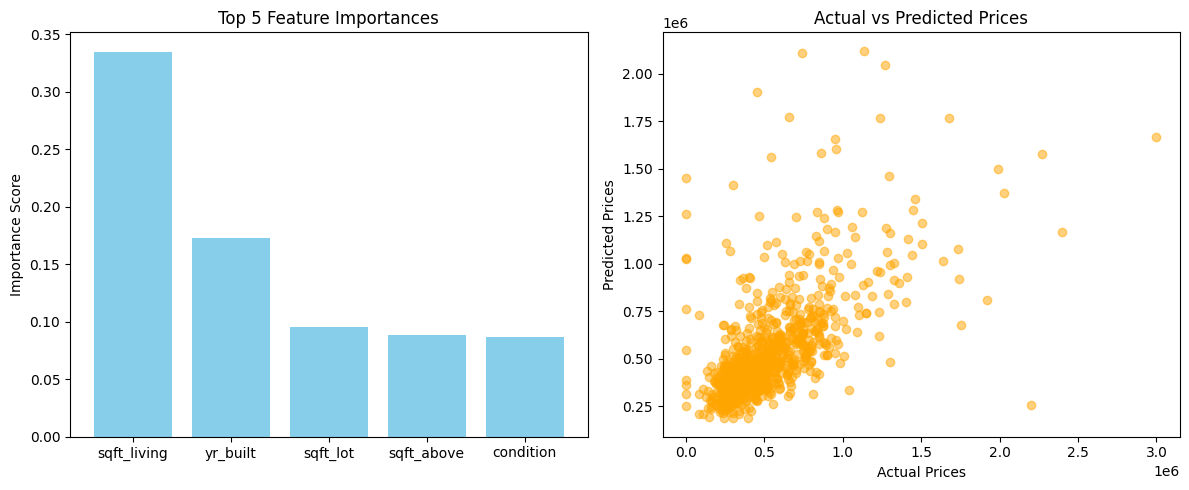

Mean Squared Error: 70924842804.69


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

df = pd.read_csv("Usa Housing Dataset.csv")

df = df.drop(['date', 'street', 'city', 'statezip', 'country'], axis=1)

df = df.dropna()

X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

importances = model.feature_importances_
features = X.columns

top_indices = importances.argsort()[::-1][:5]
top_features = [features[i] for i in top_indices]
top_importances = [importances[i] for i in top_indices]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(top_features, top_importances, color='skyblue')
plt.title("Top 5 Feature Importances")
plt.ylabel("Importance Score")

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred, alpha=0.5, color='orange')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")

plt.tight_layout()
plt.show()

print(f"Mean Squared Error: {mse:.2f}")